In [2]:
import requests
from bs4 import BeautifulSoup
from time import sleep
import sys
import pandas as pd

def crawl(url):
    while True:
        try:
            r = requests.get(url)
            return r
        except Exception as e:
            print e
            sleep(2)
            print "retrying to fetch URL!!!"

# http://stats.espncricinfo.com/ci/engine/stats/index.html?class=2;orderby=start;page=153;spanmax1=31+Dec+2013;spanmin1=1+jan+1989;spanval1=span;team=6;template=results;type=batting;view=match
def getBattingStats():
	# there are total 153 pages for the data from 1989 to 2013
    name = []
    batsmanStatus = []
    batStatMatch=[]
    runs = []
    balls = []
    strikeRate = []
    opponent = []
    venue = []
    date = []
    count = 0
    for page in range(1, 195):
        count+=1
        sys.stdout.write("\r" + "\tCrawling Innings Page: %d of 194" % count)
        sys.stdout.flush()
        url = "http://stats.espncricinfo.com/ci/engine/stats/index.html?class=2;orderby=start;page={};spanmax2=31+Dec+2015;spanmin2=1+jan+1980;spanval2=span;team=6;template=results;type=batting;view=innings".format(page)
		# Scrape the HTML at the url
        r = crawl(url)
        # Turn the HTML into a Beautiful Soup object
        soup = BeautifulSoup(r.text, "lxml")
        table = soup.find('table', attrs={'class': 'engineTable'})
        tbody = soup.find('tbody')
        rows = tbody.findAll('tr', attrs={'class': 'data1'})
        for tr in rows:
            cols = tr.findAll('td')
            record = [td.text for td in cols]
            name.append(str(record[0]))
                    # if score contains '*' batsman is not out
            batsmanStatus.append(('out', 'not out')['*' in str(record[1])])
            batStatMatch.append(str(record[1]))
            run=str(record[1])
            if '*' in run:
                run=int(run[:-1])
            elif run=='DNB' or run=='TDNB'or run=='sub':
                batsmanStatus.pop()
                batsmanStatus.append(str(record[1]))
                run=0
            else:
                run=int(run)
            runs.append(run)
                # runs.append((int(record[2]),None)[])
            balls.append(None if str(record[3]) == '-' else int(record[3]))
            strikeRate.append(None if str(record[6]) == '-' else float(record[6]))
            opponent.append(str(record[9])[2:])
            venue.append(str(record[10]))
            date.append(str(record[11]))
            battingStat = pd.DataFrame({
                                       'player': name,
                                       'outStatus': batsmanStatus,
                                       'runs': runs,
                                       'ballsFaced': balls,
                                       'strikeRate': strikeRate,
                                       'opponent': opponent,
                                       'venue': venue,
                                       'date': date
                                       })
    print"Crawling for Batting Stats completed..."
    return battingStat


Scrapping the ESPN Cric Info Website for the stats for the timeframe of 1980 to 2015

In [3]:
import requests
from bs4 import BeautifulSoup

import pandas as pd
import sys

# http://stats.espncricinfo.com/ci/engine/stats/index.html?class=2;page=1;spanmax1=31+Dec+2013;spanmin1=1+jan+1989;spanval1=span;team=6;template=results;type=team;view=results
def getMatchStats():
    count=0
    teamName=[]
    result=[]
    margin=[]
    ballsRemaining=[]
    toss=[]
    batInning=[]
    opponent=[]
    venue=[]
    date=[]
    for page in range(1,20):
        count+=1
        sys.stdout.write("\r" + "\tCrawling Results Page: %d of 19" % count)
        sys.stdout.flush()
        url="http://stats.espncricinfo.com/ci/engine/stats/index.html?class=2;page={};spanmax2=31+Dec+2015;spanmin2=1+jan+1980;spanval2=span;team=6;template=results;type=team;view=results".format(page)
        r=crawl(url)
        soup = BeautifulSoup(r.text, "lxml")
        table = soup.find('table', attrs={'class': 'engineTable'})
        tbody = soup.find('tbody')
        rows = tbody.findAll('tr', attrs={'class': 'data1'})
        for tr in rows:
            cols = tr.findAll('td')
            record = [td.text for td in cols]
            teamName.append(str(record[0]))
            result.append(str(record[1]))
            margin.append(str(record[2]))
            ballsRemaining.append(str(record[3]))
            toss.append(str(record[4]))
            batInning.append(str(record[5]))
            opponent.append(str(record[7])[2:])
            venue.append(str(record[8]))
            date.append(str(record[9]))
            matchStat=pd.DataFrame({
                                    'team':teamName,
                                    'result':result,
                                    'margin':margin,
                                    'br':ballsRemaining,
                                    'toss':toss,
                                    'batInning':batInning,
                                    'opponent': opponent,
                                    'venue': venue,
                                    'date': date
                                    })
    print"Crawling for Match Stats completed..."
    return matchStat


In [4]:
# http://stats.espncricinfo.com/ci/engine/stats/index.html?class=2;page=2;spanmax1=31+Dec+2015;spanmin1=1+jan+1980;spanval1=span;team=6;template=results;type=team;view=match
def getTeamRecords():
    count=0
    runs=[]
    wickets=[]
    balls=[]
    rpo=[]
    result=[]
    opposition=[]
    date=[]
    for page in range(1,19):
        count+=1
        sys.stdout.write("\r" + "\tCrawling Team Records Page: %d of 18" % count)
        sys.stdout.flush()
        url="http://stats.espncricinfo.com/ci/engine/stats/index.html?class=2;page={};spanmax1=31+Dec+2015;spanmin1=1+jan+1980;spanval1=span;team=6;template=results;type=team;view=match".format(page)
        r=crawl(url)
        soup = BeautifulSoup(r.text, "lxml")
        table = soup.find('table', attrs={'class': 'engineTable'})
        tbody = soup.find('tbody')
        rows = tbody.findAll('tr', attrs={'class': 'data1'})
        for tr in rows:
            cols = tr.findAll('td')
            record = [td.text for td in cols]
            runs.append(int(record[1]))
            wickets.append(int(record[2]))
            balls.append(int(record[3]))
            rpo.append(str(record[5]))
            result.append(str(record[6]))
            opposition.append(str(record[8])[2:])
            date.append(str(record[10]))
            teamRecordsDF=pd.DataFrame({
                    'teamRuns':runs,
                    'wickets':wickets,
                    'teamBalls':balls,
                    'rpo':rpo,
                    'result':result,
                    'opposition':opposition,
                    'date':date
                })
    print "Crawling for Team Records completed..."
    return teamRecordsDF

In [5]:
import time

starttime=time.time()
print"\n"
print "\nGetting Stats for Every batsmen inning by inning"
battingStatDF=getBattingStats() 
print "\nGetting Match Statistics"
matchStatDF=getMatchStats()
print "\nGetting Team Record Statistics"
teamRecordsDF=getTeamRecords()
end=time.time()
print "\tTotal Time Taken :"+str(end-starttime) 





Getting Stats for Every batsmen inning by inning
	Crawling Innings Page: 194 of 194Crawling for Batting Stats completed...

Getting Match Statistics
	Crawling Results Page: 19 of 19Crawling for Match Stats completed...

Getting Team Record Statistics
	Crawling Team Records Page: 18 of 18Crawling for Team Records completed...
	Total Time Taken :400.634000063


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline  
statDF=battingStatDF.merge(matchStatDF, on='date',how='inner')
statDF.drop(['opponent_y','venue_y','team'],axis=1,inplace=True)


In [7]:
import seaborn as sns
sns.set(color_codes=True)
newDF=dict(statDF.groupby(by=['player'])['runs'].sum())
newDF=sorted(newDF.items(), key=lambda x: x[1],reverse=True)
player=zip(*newDF)[0]
runs=zip(*newDF)[1]

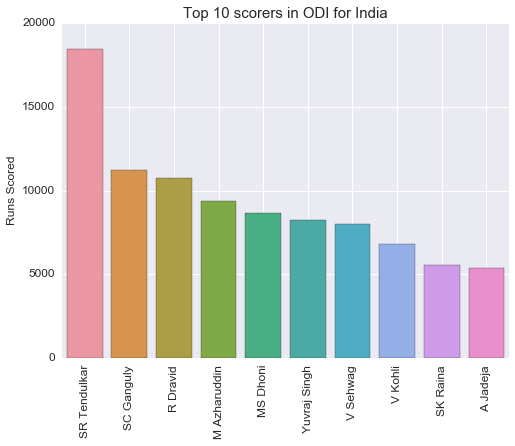

In [8]:
ax=sns.barplot(x=player[:10],y=runs[:10])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.figure.set_size_inches(8,6)
ax.axes.set_title('Top 10 scorers in ODI for India', fontsize=15)
ax.set_ylabel('Runs Scored',size=12)
ax.tick_params(labelsize=12)
plt.grid(True)

In [9]:

newDF=dict(statDF.groupby(by=['player','result'])['runs'].sum())
newDF=sorted(newDF.items(), key=lambda x: x[1],reverse=True)
newDF[:20]

[(('SR Tendulkar', 'won'), 11157),
 (('SC Ganguly', 'won'), 6818),
 (('SR Tendulkar', 'lost'), 6585),
 (('R Dravid', 'won'), 5729),
 (('Yuvraj Singh', 'won'), 5622),
 (('V Sehwag', 'won'), 5605),
 (('MS Dhoni', 'won'), 5056),
 (('M Azharuddin', 'won'), 4992),
 (('V Kohli', 'won'), 4987),
 (('R Dravid', 'lost'), 4686),
 (('SC Ganguly', 'lost'), 4295),
 (('M Azharuddin', 'lost'), 4085),
 (('G Gambhir', 'won'), 3936),
 (('SK Raina', 'won'), 3650),
 (('MS Dhoni', 'lost'), 3204),
 (('NS Sidhu', 'won'), 3005),
 (('RG Sharma', 'won'), 2832),
 (('A Jadeja', 'won'), 2727),
 (('A Jadeja', 'lost'), 2530),
 (('Yuvraj Singh', 'lost'), 2484)]

In [10]:
win={}
lost={}
other={}
for record in newDF:
    if record[0][1]=='won':
        win[record[0][0]]=record[1]
    elif record[0][1]=='lost':
        lost[record[0][0]]=record[1]
    else:
        other[record[0][0]]=record[1]
win=sorted(win.items(), key=lambda x: x[1],reverse=True)
lost=sorted(lost.items(), key=lambda x: x[1],reverse=True)

playerWin=zip(*win)[0]
runsWin=zip(*win)[1]
playerLoss=zip(*lost)[0]
runsLoss=zip(*lost)[1]

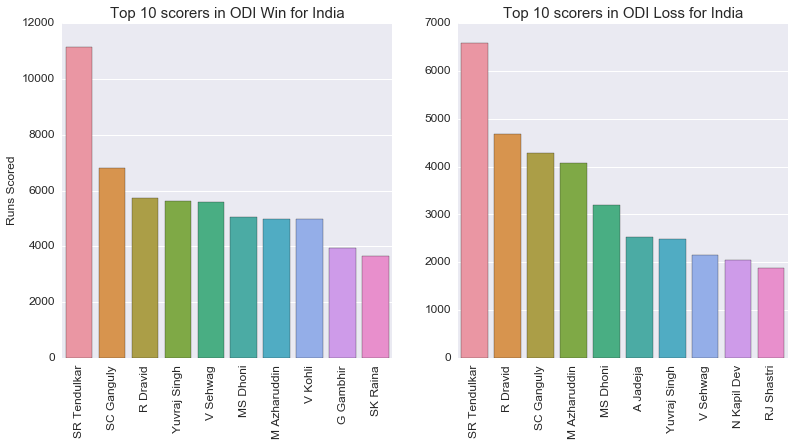

In [11]:
fig,(ax1,ax2)=plt.subplots(ncols=2)
ax=sns.barplot(x=playerWin[:10],y=runsWin[:10],ax=ax1)
ax=sns.barplot(x=playerLoss[:10],y=runsLoss[:10],ax=ax2)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
ax.figure.set_size_inches(13,6)
ax1.axes.set_title('Top 10 scorers in ODI Win for India', fontsize=15)
ax2.axes.set_title('Top 10 scorers in ODI Loss for India', fontsize=15)
ax1.set_ylabel('Runs Scored',size=12)
ax1.tick_params(labelsize=12)
ax2.tick_params(labelsize=12)

In [12]:
statistics=statDF.merge(teamRecordsDF, on='date',how='inner')
statistics.drop(['result_y'],axis=1,inplace=True)
statistics.head()


,ballsFaced,date,opponent_x,outStatus,player,runs,strikeRate,venue_x,batInning,br,margin,result_x,toss,opposition,rpo,teamBalls,teamRuns,wickets
0,11.0,6 Dec 1980,Australia,out,SM Gavaskar,4,36.36,Melbourne,1st,,66 runs,won,lost,Australia,4.24,294,208,9
1,12.0,6 Dec 1980,Australia,out,TE Srinivasan,6,50.00,Melbourne,1st,,66 runs,won,lost,Australia,4.24,294,208,9
2,72.0,6 Dec 1980,Australia,out,DB Vengsarkar,22,30.55,Melbourne,1st,,66 runs,won,lost,Australia,4.24,294,208,9
3,44.0,6 Dec 1980,Australia,out,GR Viswanath,22,50.00,Melbourne,1st,,66 runs,won,lost,Australia,4.24,294,208,9
4,22.0,6 Dec 1980,Australia,out,KBJ Azad,4,18.18,Melbourne,1st,,66 runs,won,lost,Australia,4.24,294,208,9


In [13]:
new=dict(statistics.groupby(by=['player','result_x'])['runs'].sum())
newRuns=sorted(new.items(), key=lambda x: x[1],reverse=True)
newTeamRuns=dict(statistics.groupby(by=['player','result_x'])['teamRuns'].sum())

In [16]:
winPercent={}
lossPercent={}
for record in newRuns:
    if record[1]>1500:
        if record[0][1]=='won':
            winPercent[record[0][0]]=float(record[1])/int(newTeamRuns[record[0]])*100
        elif record[0][1]=='lost':
            lossPercent[record[0][0]]=float(record[1])/int(newTeamRuns[record[0]])*100
winPercent

{'A Jadeja': 12.980769230769232,
 'G Gambhir': 16.052856968065583,
 'K Srikkanth': 16.49609962069706,
 'M Azharuddin': 14.20199146514936,
 'M Kaif': 9.554338354288559,
 'MS Dhoni': 13.347765252514584,
 'N Kapil Dev': 7.620463733097904,
 'NS Sidhu': 19.38959865789134,
 'R Dravid': 14.706335352705615,
 'RG Sharma': 13.793775266669913,
 'S Dhawan': 20.596840257460503,
 'SC Ganguly': 18.723567858515956,
 'SK Raina': 10.73056004703807,
 'SR Tendulkar': 19.698788799039512,
 'V Kohli': 19.844017349090766,
 'V Sehwag': 16.78897708551745,
 'VG Kambli': 13.250991155840195,
 'Yuvraj Singh': 13.424389312065713}

In [17]:
winPercent={key: winPercent[key] for key in winPercent if key not in ['N Kapil Dev','M Kaif','A Jadeja','VG Kambli']}

In [18]:
lossPercent

{'A Jadeja': 12.663930323355691,
 'DB Vengsarkar': 13.907599651319439,
 'K Srikkanth': 12.18754315702251,
 'M Azharuddin': 12.957558840322273,
 'MS Dhoni': 13.944379161770465,
 'N Kapil Dev': 9.92759609310462,
 'R Dravid': 13.50121009565518,
 'RG Sharma': 13.812526271542666,
 'RJ Shastri': 11.79206738324219,
 'RR Singh': 10.553777654097676,
 'SC Ganguly': 13.88978720651963,
 'SK Raina': 9.72324409983587,
 'SR Tendulkar': 15.349650349650348,
 'V Kohli': 13.157496977025392,
 'V Sehwag': 10.025051029875673,
 'Yuvraj Singh': 10.312188641647294}

In [19]:
lossPercent={key: lossPercent[key] for key in lossPercent if key not in ['N Kapil Dev','SK Raina']}

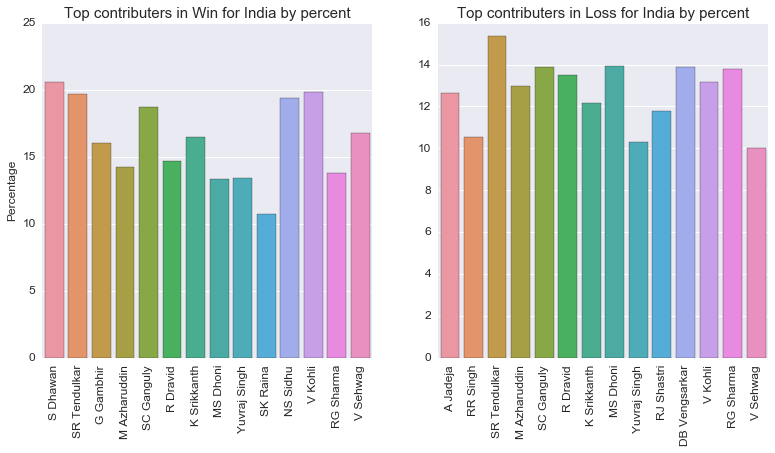

In [20]:
fig,(ax1,ax2)=plt.subplots(ncols=2)
ax=sns.barplot(x=winPercent.keys(),y=winPercent.values(),ax=ax1)
ax=sns.barplot(x=lossPercent.keys(),y=lossPercent.values(),ax=ax2)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
ax.figure.set_size_inches(13,6)
ax1.axes.set_title('Top contributers in Win for India by percent', fontsize=15)
ax2.axes.set_title('Top contributers in Loss for India by percent', fontsize=15)
ax1.set_ylabel('Percentage',size=12)
ax1.tick_params(labelsize=12)
ax2.tick_params(labelsize=12)

In [21]:
tendulkar=list(statistics[statistics.player=='SR Tendulkar'].runs)
ganguly=list(statistics[statistics.player=='SC Ganguly'].runs)
dravid=list(statistics[statistics.player=='R Dravid'].runs)
dhoni=list(statistics[statistics.player=='MS Dhoni'].runs)
kohli=list(statistics[statistics.player=='V Kohli'].runs)
sehwag=list(statistics[statistics.player=='V Sehwag'].runs)

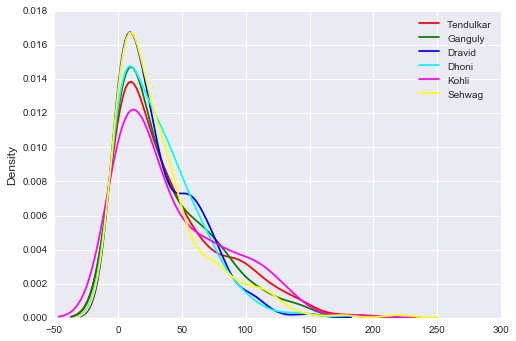

In [25]:
import seaborn as sns
import numpy as np

N=max(max(set(tendulkar)),max(set(ganguly)),max(set(dravid)),max(set(dhoni)),max(set(kohli)),max(set(sehwag)))
binsize = np.arange(0,N+1,1)
sns.distplot(tendulkar, hist=False, label="Tendulkar", color='red',bins=binsize)
sns.distplot(ganguly, hist=False, label="Ganguly", color='green',bins=binsize)
sns.distplot(dravid, hist=False, label="Dravid", color='blue',bins=binsize)
sns.distplot(dhoni, hist=False, label="Dhoni", color='cyan',bins=binsize)
sns.distplot(kohli, hist=False, label="Kohli", color='magenta',bins=binsize)
sns.distplot(sehwag, hist=False, label="Sehwag", color='yellow',bins=binsize)
plt.ylabel('Density',size=12)

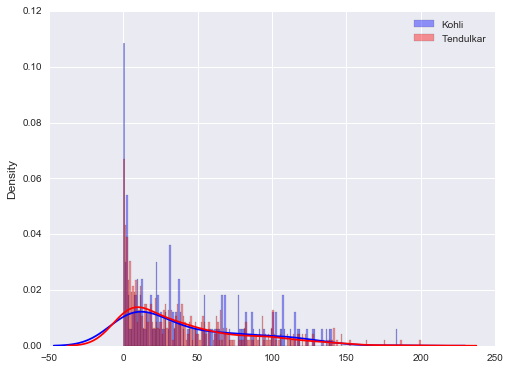

In [28]:
N=max(set(tendulkar))
binsize = np.arange(0,N+1,1)
plt.figure(figsize=(8, 6))
ax=sns.distplot(kohli, hist=True, label="Kohli", color='blue',bins=binsize)
ax=sns.distplot(tendulkar, hist=True, label="Tendulkar", color='red',bins=binsize)
plt.ylabel('Density',size=12)
ax.legend()

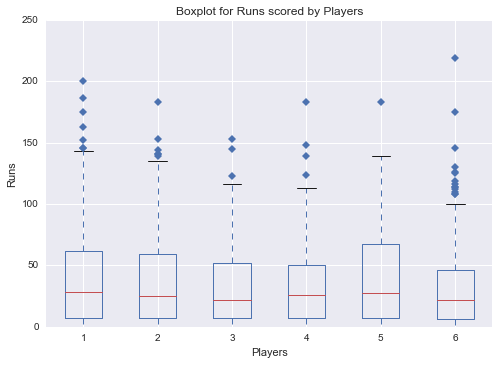

In [29]:
boxes=[tendulkar,ganguly,dravid,dhoni,kohli,sehwag]
labels=['Tendulkar','Ganguly','Dravid','Dhoni','Kohli','Sehwag']
ax=plt.boxplot(boxes,0,'gD')

plt.xticks=(range(1,len(boxes)+1),labels)
plt.ylabel('Runs')
plt.xlabel('Players')
plt.grid(True)
plt.title('Boxplot for Runs scored by Players')

In [30]:
def convertToDate(x):
    x=pd.to_datetime(x,format='%d %b %Y')
    return x

In [31]:
statistics.date=statistics.date.apply(convertToDate)
statistics= statistics.sort_values(by='date')
sachinDF=statistics[statistics.player=='SR Tendulkar']
sachinDF=sachinDF.assign(matchNo=range(1,len(sachinDF)+1))
sachinDF=sachinDF.assign(cumulativeRuns=sachinDF.runs.cumsum())

In [32]:
viratDF=statistics[statistics.player=='V Kohli']
viratDF=viratDF.assign(matchNo=range(1,len(viratDF)+1))
viratDF=viratDF.assign(cumulativeRuns=viratDF.runs.cumsum())

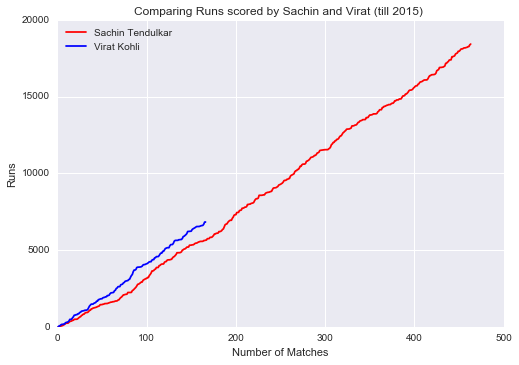

In [33]:
# sachinDF.plot(y='cumulativeRuns', x='matchNo')
plt.plot(sachinDF.matchNo,sachinDF.cumulativeRuns,color='red')
plt.plot(viratDF.matchNo,viratDF.cumulativeRuns,color='blue')
plt.legend(['Sachin Tendulkar','Virat Kohli'],loc='upper left')
plt.xlabel('Number of Matches')
plt.ylabel('Runs')
plt.title("Comparing Runs scored by Sachin and Virat (till 2015) ")

<p>Predicting how much matches Virat will need to break Sachin's record of highest runs in ODI</p>

In [34]:
from sklearn import linear_model
sachinRecord=int(sachinDF[-1:].cumulativeRuns)
trainingRuns=np.asarray(viratDF.cumulativeRuns)
trainingMatches=np.asarray(viratDF.matchNo)
trainingRuns=trainingRuns.reshape(-1,1)

clf=linear_model.LinearRegression()
clf.fit(trainingRuns,trainingMatches)
print "number of matches required for Virat to break Sachin's record: ",(clf.predict(sachinRecord))


number of matches required for Virat to break Sachin's record:  [ 433.02132813]


to make 18426 runs Sachin took 463 matches, if Virat Kohli continues to play in the same way he will take 30 matches less

<p></p>

In [25]:
centuryPlayers=statistics[statistics.runs>=100]
df=centuryPlayers.groupby(by=['player','result_x']).count()
sortedDF=df.sort_values(by='date', ascending=False)

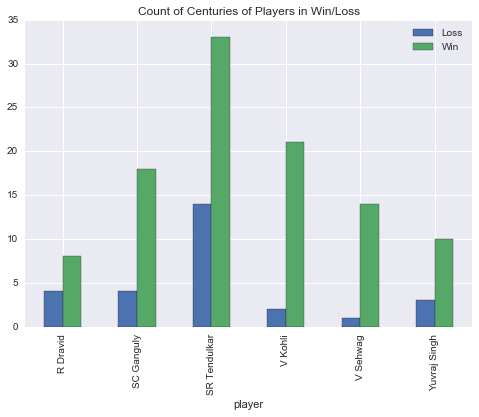

In [26]:
specificPlayers=statistics[statistics['player'].isin(['SR Tendulkar','R Dravid','SC Ganguly','V Kohli','Yuvraj Singh','V Sehwag'])]
centuryPlayers=specificPlayers[specificPlayers.runs>=100]
df=pd.DataFrame({'count':centuryPlayers.groupby(by=['player','result_x']).size()})
df=df.drop(df.index[[5,6]])
dfu=df.unstack(level=1)
ax=dfu.plot(kind='bar', title='Count of Centuries of Players in Win/Loss')
handles, labels = ax.get_legend_handles_labels()
labels=['Loss','Win']
ax.legend(handles,labels)
